In [701]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [702]:
df = pd.read_csv("BankChurners.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [703]:
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [704]:
df.shape

(10127, 21)

In [705]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [707]:
df.drop("CLIENTNUM",axis=1,inplace=True)

In [708]:
df.duplicated().sum()

0

In [709]:
df.nunique() #Check the 

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

Explore the data

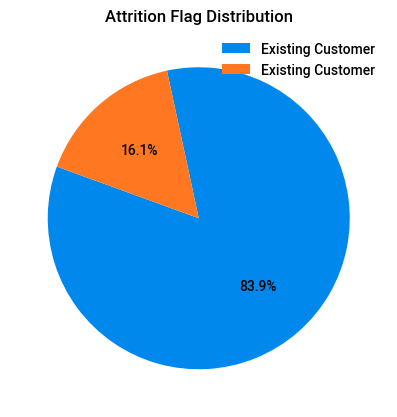

In [710]:
plt.figure(figsize=(10,5))
plt.pie(df.Attrition_Flag.value_counts(),autopct="%1.1f%%",startangle=160)
plt.title("Attrition Flag Distribution")
plt.legend(labels=df.Attrition_Flag,loc=0,labelcolor="black",frameon=False)
plt.show()


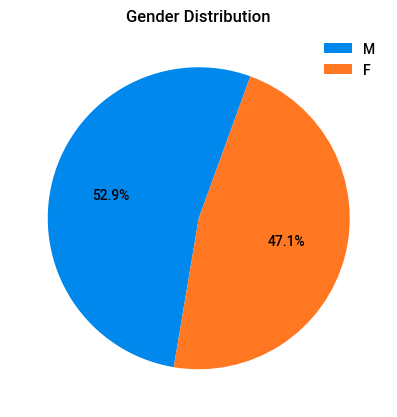

In [711]:
plt.figure(figsize=(10,5))
plt.pie(df.Gender.value_counts(),autopct="%1.1f%%",startangle=70)
plt.title("Gender Distribution")
plt.legend(labels=df.Gender,loc=0,labelcolor="black",frameon=False)
plt.show()

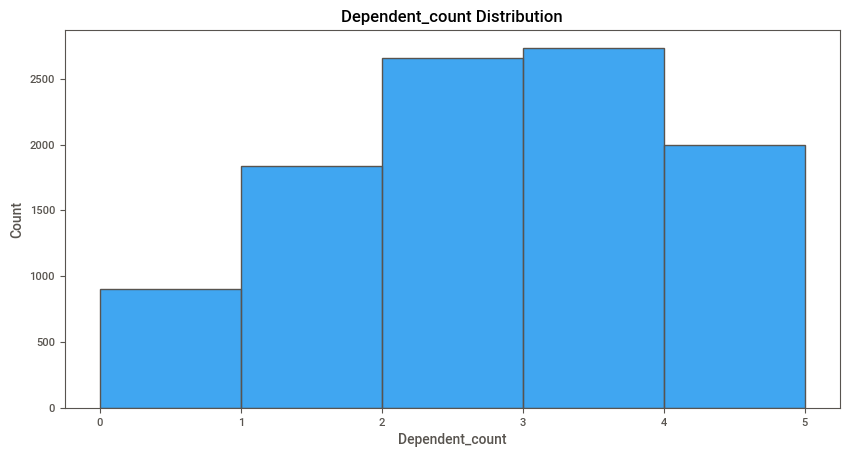

In [712]:
plt.figure(figsize=(10,5))
sns.histplot(df,x=df.Dependent_count,bins=5)
plt.title("Dependent_count Distribution")
plt.show()


import sweetviz as sv
report = sv.analyze(df)
report.show_html("report.html")

Attrition_Flag,Gender, Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category, 
Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio

!pip install datasist

In [713]:
from datasist.structdata import detect_outliers

In [714]:
df_num = df.select_dtypes(include="number")
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR
#df = df[~((df_num<lower_bound)|(df_num>upper_bound)).any(axis=1)]

AxesSubplot(0.125,0.125;0.775x0.755)


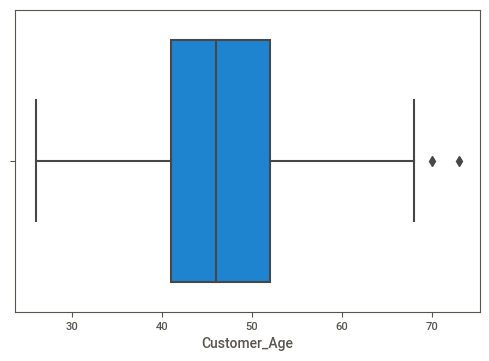

AxesSubplot(0.125,0.125;0.775x0.755)


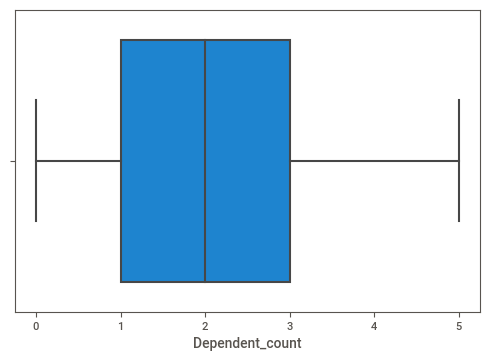

AxesSubplot(0.125,0.125;0.775x0.755)


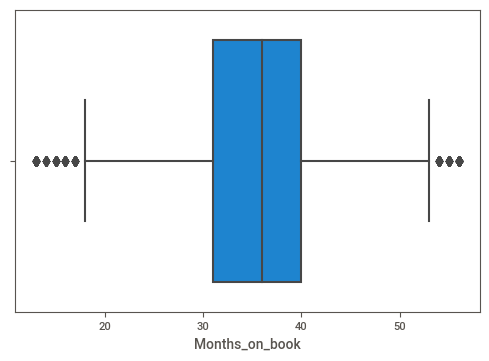

AxesSubplot(0.125,0.125;0.775x0.755)


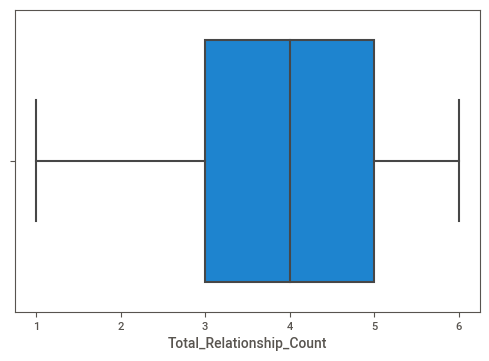

AxesSubplot(0.125,0.125;0.775x0.755)


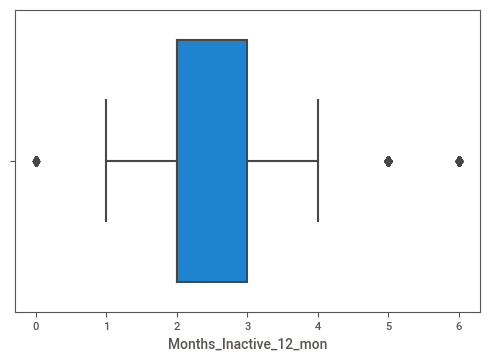

AxesSubplot(0.125,0.125;0.775x0.755)


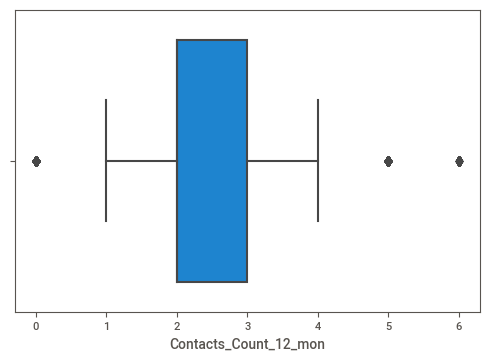

AxesSubplot(0.125,0.125;0.775x0.755)


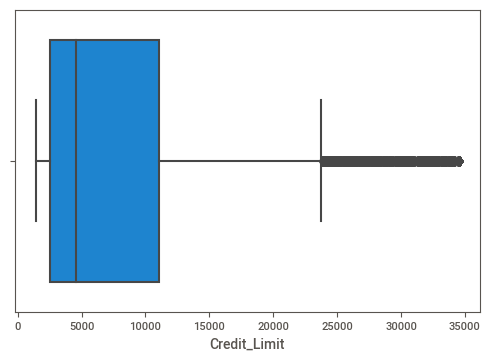

AxesSubplot(0.125,0.125;0.775x0.755)


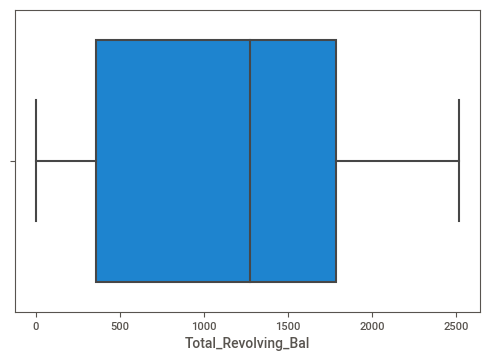

AxesSubplot(0.125,0.125;0.775x0.755)


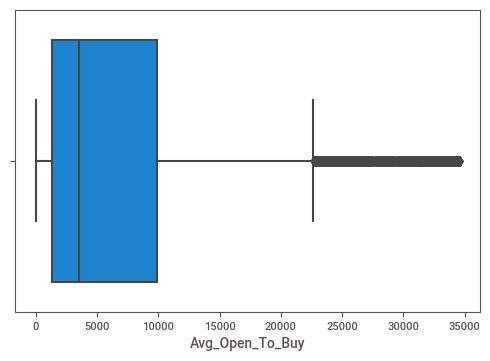

AxesSubplot(0.125,0.125;0.775x0.755)


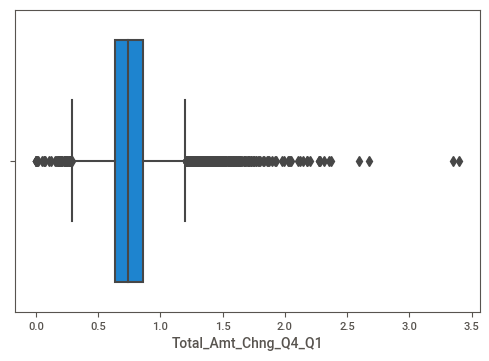

AxesSubplot(0.125,0.125;0.775x0.755)


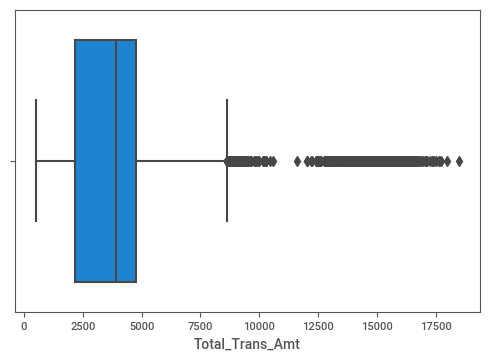

AxesSubplot(0.125,0.125;0.775x0.755)


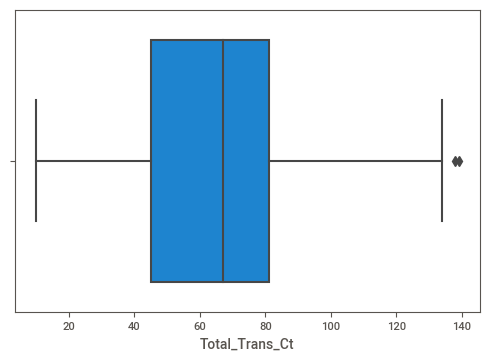

AxesSubplot(0.125,0.125;0.775x0.755)


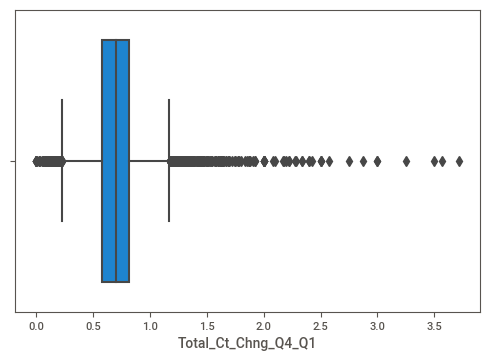

AxesSubplot(0.125,0.125;0.775x0.755)


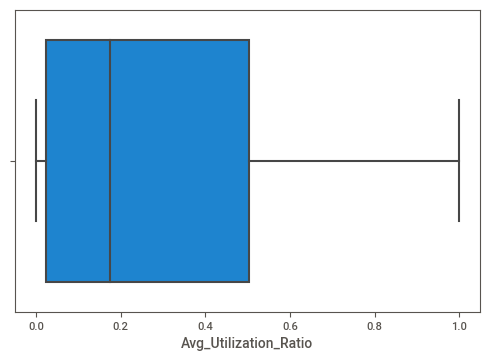

In [715]:

for cols in df_num.columns:
    print(sns.boxplot(x=df_num[cols]))
    plt.show()

In [716]:
outliers = detect_outliers(df,n=1.5,features=df_num)

In [717]:
len(outliers)

1274

In [718]:
df = df.drop(outliers)

In [719]:
df.shape

(8853, 20)

<AxesSubplot:>

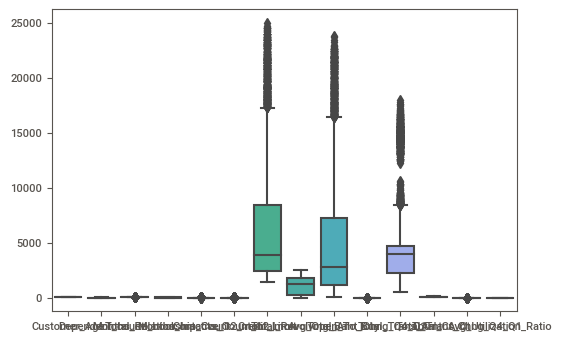

In [720]:
sns.boxplot(df)

In [721]:
df_num = df.select_dtypes(include="number")
outliers = detect_outliers(df,n=1.5,features=df_num)

In [722]:
len(outliers)

524

In [723]:
df = df.drop(outliers)

In [724]:
df.shape

(8329, 20)

In [725]:
df_num = df.select_dtypes(include="number")
outliers = detect_outliers(df,n=1.5,features=df_num)

In [726]:
len(outliers)

355

In [727]:
df = df.drop(outliers)

In [728]:
df.shape

(7974, 20)

In [729]:
df_num = df.select_dtypes(include="number")
outliers = detect_outliers(df,n=1.5,features=df_num)

In [730]:
len(outliers)

243

In [731]:
df = df.drop(outliers)

In [732]:
df.shape

(7731, 20)

In [733]:
df_num = df.select_dtypes(include="number")
outliers = detect_outliers(df,n=1.5,features=df_num)

In [734]:
len(outliers)

166

In [735]:
df = df.drop(outliers)

In [736]:
df.shape

(7565, 20)

In [737]:
df_num = df.select_dtypes(include="number")
outliers = detect_outliers(df,n=1.5,features=df_num)

In [738]:
len(outliers)

116

In [739]:
df = df.drop(outliers)

In [740]:
df.shape

(7449, 20)

In [741]:
df_num = df.select_dtypes(include="number")
outliers = detect_outliers(df,n=1.5,features=df_num)

In [742]:
len(outliers)

81

In [743]:
df = df.drop(outliers)

In [744]:
df.shape

(7368, 20)

In [745]:
df_num = df.select_dtypes(include="number")
outliers = detect_outliers(df,n=1.5,features=df_num)

In [746]:
len(outliers)

65

In [747]:
df = df.drop(outliers)

In [748]:
df.shape

(7303, 20)

In [749]:
df_num = df.select_dtypes(include="number")
outliers = detect_outliers(df,n=1.5,features=df_num)

In [750]:
len(outliers)

39

In [751]:
df = df.drop(outliers)

In [752]:
df.shape

(7264, 20)

In [753]:
df_num = df.select_dtypes(include="number")
outliers = detect_outliers(df,n=1.5,features=df_num)

In [754]:
len(outliers)

20

In [755]:
df = df.drop(outliers)

In [756]:
df.shape

(7244, 20)

In [757]:
df_num = df.select_dtypes(include="number")
outliers = detect_outliers(df,n=1.5,features=df_num)

In [758]:
len(outliers)

20

In [759]:
df = df.drop(outliers)

In [760]:
df.shape

(7224, 20)

In [761]:
df_num = df.select_dtypes(include="number")
outliers = detect_outliers(df,n=1.5,features=df_num)

In [762]:
len(outliers)

5

In [763]:
df = df.drop(outliers)

In [764]:
df.shape

(7219, 20)

In [765]:
df_num = df.select_dtypes(include="number")
outliers = detect_outliers(df,n=1.5,features=df_num)

In [766]:
len(outliers)

5

In [767]:
df = df.drop(outliers)

In [768]:
df.shape

(7214, 20)

In [769]:
df_num = df.select_dtypes(include="number")
outliers = detect_outliers(df,n=1.5,features=df_num)

In [770]:
len(outliers)

1

In [771]:
df = df.drop(outliers)

In [772]:
df.shape

(7213, 20)

In [773]:
df_num = df.select_dtypes(include="number")
outliers = detect_outliers(df,n=1.5,features=df_num)

In [774]:
len(outliers)

1

In [775]:
df = df.drop(outliers)

In [776]:
df.shape

(7212, 20)

In [777]:
df_num = df.select_dtypes(include="number")
outliers = detect_outliers(df,n=1.5,features=df_num)

In [778]:
len(outliers)

0

In [779]:
df = df.drop(outliers)

In [780]:
df.shape

(7212, 20)

In [781]:
cat = df.select_dtypes(include='O')

In [782]:
cat

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
5,Existing Customer,M,Graduate,Married,$40K - $60K,Blue
10,Existing Customer,M,Uneducated,Unknown,$120K +,Blue
13,Existing Customer,M,Graduate,Unknown,$60K - $80K,Blue
14,Existing Customer,F,Graduate,Married,Less than $40K,Blue
21,Attrited Customer,F,Graduate,Married,Less than $40K,Blue
...,...,...,...,...,...,...
10121,Existing Customer,F,Graduate,Single,Less than $40K,Blue
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue


In [784]:
from sklearn.preprocessing import MinMaxScaler

In [786]:
df_num = df.select_dtypes(include="number")

In [789]:
mm = MinMaxScaler()
df_num_scale = mm.fit_transform(df_num)
df_num_scale =pd.DataFrame(df_num_scale,)

array([[0.42857143, 0.4       , 0.53488372, ..., 0.11570248, 0.23559908,
        0.31256281],
       [0.38095238, 1.        , 0.41860465, ..., 0.26446281, 0.18778802,
        0.21809045],
       [0.21428571, 0.6       , 0.39534884, ..., 0.19008264, 0.56797235,
        0.1959799 ],
       ...,
       [0.35714286, 0.4       , 0.27906977, ..., 0.48760331, 0.18865207,
        0.51356784],
       [0.42857143, 0.2       , 0.53488372, ..., 0.41322314, 0.22753456,
        0.        ],
       [0.0952381 , 0.4       , 0.53488372, ..., 0.42975207, 0.19988479,
        0.        ]])